In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import stim
import pymatching

# Code parameters
d=3
T=3
layout = [25, 19, 26, 22, 16] # Hardcoded for testing purposes, can be retrieved


circuit = stim.Circuit.generated("repetition_code:memory",
                                 distance=d,
                                 rounds=T,
                                 after_clifford_depolarization=0.1)

model = circuit.detector_error_model(decompose_errors=True)
matching = pymatching.Matching.from_detector_error_model(model)

#draw_matching_graph(matching, d, T)

In [6]:
from result_saver import SaverProvider
from soft_info import get_counts, get_KDEs
provider = SaverProvider()


job = provider.retrieve_job("cmyhbrqrmwhg008bs4h0")
memory = job.result().get_memory()

kde_dict, scaler_dict = get_KDEs(provider, 'ibmq_mumbai', layout, bandwidths=0.2, plot=False)


# Plot node order


---- New edge ----
0 None {'fault_ids': set(), 'weight': 2.8763855159214238, 'error_probability': 0.05333333333333338}

---- New edge ----
0 1 {'fault_ids': set(), 'weight': 3.568738257010482, 'error_probability': 0.02741843737473918}

---- New edge ----
0 2 {'fault_ids': set(), 'weight': 3.568738257010482, 'error_probability': 0.02741843737473918}

---- New edge ----
0 3 {'fault_ids': set(), 'weight': 2.876385515921424, 'error_probability': 0.05333333333333336}

---- New edge ----
1 3 {'fault_ids': set(), 'weight': 3.568738257010482, 'error_probability': 0.02741843737473918}

---- New edge ----
1 None {'fault_ids': {0}, 'weight': 2.8763855159214238, 'error_probability': 0.05333333333333338}

---- New edge ----
2 None {'fault_ids': set(), 'weight': 2.1864072823588314, 'error_probability': 0.10097777777777785}

---- New edge ----
2 3 {'fault_ids': set(), 'weight': 2.876385515921424, 'error_probability': 0.05333333333333336}

---- New edge ----
2 4 {'fault_ids': set(), 'weight': 3.56873

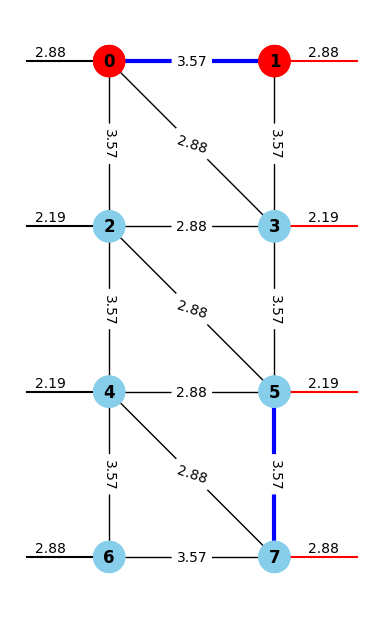

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_matching_graph(matching, d, T, syndromes=None, matched_edges=None, figsize=(8, 6)):
    G = nx.Graph()
    pos = {}
    edge_colors = []
    edge_widths = []
    node_colors = []

    # Define normal and highlighted edge widths
    normal_edge_width = 1
    highlighted_edge_width = 3

    # Add all nodes to the graph with their positions and initial colors
    for i in range((d-1)*(T+1)):
        x_pos = i % (d-1)
        y_pos = i // (d-1)
        G.add_node(i)  # Explicitly add the node
        pos[i] = (x_pos, -y_pos)
        if syndromes and syndromes[i] == 1:
            node_colors.append('red')
        else:
            node_colors.append('skyblue')
    
    # Add edges to the graph
    for edge in matching.edges():
        print("\n---- New edge ----")
        src_node, tgt_node, edge_data = edge
        print(src_node, tgt_node, edge_data)
        if tgt_node is not None:
            G.add_edge(src_node, tgt_node, weight=edge_data['weight'])
            if matched_edges and ([src_node, tgt_node] in matched_edges or [tgt_node, src_node] in matched_edges):
                edge_colors.append('blue')
                edge_widths.append(highlighted_edge_width)
            else:
                edge_colors.append('black')
                edge_widths.append(normal_edge_width)
        else:
            # Handle dangling edges
            pass  # Your existing logic for dangling edges can be included here
    
    # Draw the graph
    plt.figure(figsize=figsize)
    nx.draw(G, pos, labels={node: node for node in G.nodes()}, with_labels=True, 
            node_color=node_colors, edge_color=edge_colors, width=edge_widths, 
            font_weight='bold', node_size=500, font_size=12)

    # Draw edge weights
    edge_weights = nx.get_edge_attributes(G, 'weight')
    edge_labels = {edge: f"{weight:.2f}" for edge, weight in edge_weights.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    for edge in matching.edges():
        src_node, tgt_node, edge_data = edge
        if tgt_node is None:
            x_src = src_node % (d-1)
            y_src = src_node // (d-1)
            color = 'r' if edge_data.get('fault_ids') else 'k'
            weight_text = f"{edge_data['weight']:.2f}" if 'weight' in edge_data else ""
            if x_src == 0:
                plt.plot([x_src, x_src - 0.5], [-y_src, -y_src], color=color)
                plt.text(x_src - 0.45, -y_src + 0.03, weight_text, fontsize=10)
            elif x_src == d - 2:
                plt.plot([x_src, x_src + 0.5], [-y_src, -y_src], color=color)
                plt.text(x_src + 0.2, -y_src + 0.03, weight_text, fontsize=10)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

    plt.axis('scaled')
    plt.show()

# Example usage
syndrome = [0]*0 + [1]*2 + [0]*100
matched_edges = [[0,1], [5,7]]
draw_matching_graph(matching, d, T, syndromes=syndrome, matched_edges=matched_edges, figsize=(6, 6))



---- New edge ----
0 None {'fault_ids': set(), 'weight': 4.98, 'error_probability': 0.05333333333333338}

---- New edge ----
0 1 {'fault_ids': set(), 'weight': 4.98, 'error_probability': 0.02741843737473918}

---- New edge ----
0 2 {'fault_ids': set(), 'weight': 2.74, 'error_probability': 0.02741843737473918}

---- New edge ----
0 3 {'fault_ids': set(), 'weight': 4.98, 'error_probability': 0.05333333333333336}

---- New edge ----
1 3 {'fault_ids': set(), 'weight': 2.0100000000000002, 'error_probability': 0.02741843737473918}

---- New edge ----
1 None {'fault_ids': {0}, 'weight': 4.98, 'error_probability': 0.05333333333333338}

---- New edge ----
2 None {'fault_ids': set(), 'weight': 4.98, 'error_probability': 0.10097777777777785}

---- New edge ----
2 3 {'fault_ids': set(), 'weight': 4.98, 'error_probability': 0.05333333333333336}

---- New edge ----
2 4 {'fault_ids': set(), 'weight': 3.73, 'error_probability': 0.02741843737473918}

---- New edge ----
2 5 {'fault_ids': set(), 'weight

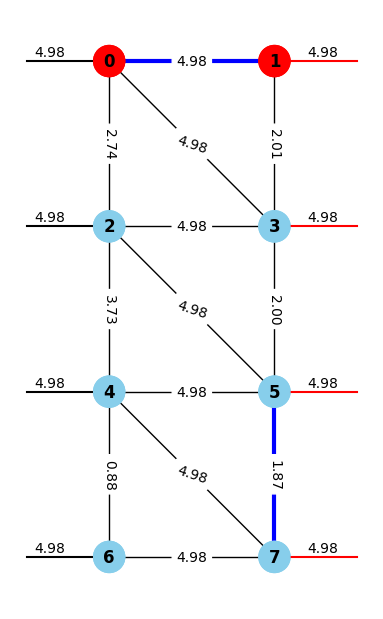

In [8]:
from soft_info import soft_reweight_pymatching

shot = 0

IQ_data = memory[shot]
counts = get_counts([IQ_data], kde_dict, scaler_dict, layout, T, verbose=False)
count_key = next(iter(counts.keys()))

soft_reweight_pymatching(matching, d, T, IQ_data, kde_dict, layout, scaler_dict, common_measure=0.01, verbose=False)  

syndrome = [0]*0 + [1]*2 + [0]*100
matched_edges = [[0,1], [5,7]]
draw_matching_graph(matching, d, T, syndromes=syndrome, matched_edges=matched_edges, figsize=(6, 6))

# Plot syndromes